In [27]:
import numpy as np 
import pandas as pd 

import os
import warnings
import os
warnings.filterwarnings("ignore")



from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


In [28]:
from google.colab import files
uploaded  = files.upload() 
data = pd.read_csv("voice.csv")

Saving voice.csv to voice (1).csv


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [30]:
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [31]:
data.label = [1 if each == "male" else 0 for each in data.label]
data.head() # check if binary conversion worked

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [32]:
X = data[['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm',	'mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom',	'mindom',	'maxdom',	'dfrange',	'modindx']]
Y = data['label']

X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2)
print(X_train.head())

      meanfreq        sd    median  ...    maxdom   dfrange   modindx
575   0.146211  0.081070  0.146041  ...  5.601562  5.593750  0.130686
1974  0.112153  0.076917  0.097391  ...  3.250000  3.242188  0.182865
1780  0.183046  0.031869  0.187398  ...  0.867188  0.703125  0.149206
695   0.157915  0.062103  0.176599  ...  0.781250  0.683594  0.459416
2097  0.194840  0.028648  0.192754  ...  6.898438  6.734375  0.069412

[5 rows x 20 columns]


In [33]:
X = data[['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm',	'mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom',	'mindom',	'maxdom',	'dfrange',	'modindx']]
Y = data['label']

X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2)
print(X_train.head())

      meanfreq        sd    median  ...     maxdom    dfrange   modindx
2325  0.227439  0.035455  0.234076  ...  11.718750  11.695312  0.072574
1846  0.182051  0.056408  0.193285  ...   0.695312   0.640625  0.146341
1110  0.197992  0.061894  0.219228  ...   8.250000   8.226562  0.102634
1914  0.121446  0.084219  0.125800  ...   0.968750   0.960938  0.238386
865   0.171548  0.065805  0.189053  ...   7.640625   7.617188  0.128571

[5 rows x 20 columns]


In [34]:
print("Shape of train set",X_train.shape,Y_train.shape)
print("Shape of test set",X_test.shape,Y_test.shape)

Shape of train set (2534, 20) (2534,)
Shape of test set (634, 20) (634,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf45354400>,
      dtype=object)

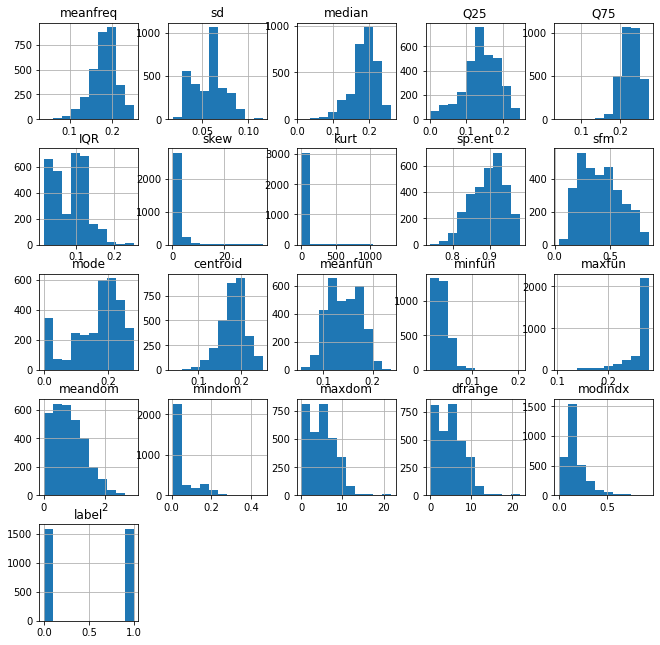

In [35]:
data.hist(figsize=[11,11])

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.6971608832807571

STANDARDIZATION

In [37]:
X_train_scale=scale(X_train[['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm',	'mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom',	'mindom',	'maxdom',	'dfrange',	'modindx']])
X_test_scale=scale(X_test[['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm',	'mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom',	'mindom',	'maxdom',	'dfrange',	'modindx']])
# Fitting k-NN on our scaled data set
knn_after_std=KNeighborsClassifier(n_neighbors=5)
knn_after_std.fit(X_train[['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm',	'mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom',	'mindom',	'maxdom',	'dfrange',	'modindx']],Y_train.values.ravel())
# Checking the performance of our model on the testing data set
print("\nAccuracy score on test set :", accuracy_score(Y_test,knn_after_std.predict(X_test_scale)))


Accuracy score on test set : 0.501577287066246


NORMALIZATION

In [38]:
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm',	'mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom',	'mindom',	'maxdom',	'dfrange',	'modindx']])
X_test_minmax=min_max.fit_transform(X_test[['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm',	'mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom',	'mindom',	'maxdom',	'dfrange',	'modindx']])
# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.9668769716088328